# DeepFashion Try-On

Towards Photo-Realistic Virtual Try-On by Adaptively Generating↔Preserving Image Content, CVPR'20.

![](https://github.com/switchablenorms/DeepFashion_Try_On/raw/master/images/tryon.png)

## For inferencing ACGPN!

ACGPN repo: https://github.com/switchablenorms/DeepFashion_Try_On

This notebook is hard coded for inferencing one image at a time.

Notebook by [Levin Dabhi](https://levindabhi.github.io/)

```
author = {Yang, Han and Zhang, Ruimao and Guo, Xiaobao and Liu, Wei and Zuo, Wangmeng and Luo, Ping},
title = {Towards Photo-Realistic Virtual Try-On by Adaptively Generating-Preserving Image Content},
booktitle = {IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)},
month = {June},
year = {2020}
}

@inproceedings{ge2021disentangled,
  title={Disentangled Cycle Consistency for Highly-realistic Virtual Try-On},
  author={Ge, Chongjian and Song, Yibing and Ge, Yuying and Yang, Han and Liu, Wei and Luo, Ping},
  booktitle={Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition},
  pages={16928--16937},
  year={2021}
}

@inproceedings{yang2022full,
title = {Full-Range Virtual Try-On With Recurrent Tri-Level Transform},
author = {Yang, Han and Yu, Xinrui and Liu, Ziwei},
booktitle = {Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition},
pages = {3460--3469}
year = {2022}
}
```

## ACGPN

- Original: https://github.com/levindabhi/ACGPN.git
- Modified: https://github.com/kairess/ACGPN.git

In [5]:
#!git clone https://github.com/kairess/ACGPN.git

%cd ACGPN

c:\Users\User\Desktop\coding\df\ACGPN


## Dependencies

In [23]:
#pip install -U --no-cache-dir gdown --pre -qq
#pip install ninja -qq

In [6]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys
import time

from predict_pose import generate_pose_keypoints

In [25]:
#os.mkdir ("Data_preprocessing/test_color")
#os.mkdir ("Data_preprocessing/test_colormask")
#os.mkdir ("Data_preprocessing/test_edge")
#os.mkdir( "Data_preprocessing/test_img")
#os.mkdir ("Data_preprocessing/test_label")
#os.mkdir ("Data_preprocessing/test_mask")
#os.mkdir ("Data_preprocessing/test_pose")
#os.mkdir ("inputs")
#os.mkdir ("inputs/img")
#os.mkdir ("inputs/cloth")

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'Data_preprocessing/test_color'

In [ ]:
#!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
#!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
Cloning into 'U-2-Net'...


## 사전학습 모델 다운로드

### 포즈 예측 모델

### 휴먼 세그멘테이션 마스크 생성 모델

In [ ]:
#gdown.download('https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH', 'lip_final.pth', quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
From (redirected): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH&confirm=t&uuid=a7cf6737-c4de-45a8-8bb1-fb2ae5f96794
To: c:\Users\User\Desktop\coding\df\ACGPN\lip_final.pth
100%|██████████| 267M/267M [00:07<00:00, 34.1MB/s] 


'lip_final.pth'

### U2Net 모델

옷 마스크 추출 모델

In [7]:
%cd U-2-Net
#os.mkdir ("saved_models")
#os.mkdir ("saved_models/u2net")
#os.mkdir ("saved_models/u2netp")

#!gdown 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
#!gdown 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth

import u2net_load
import u2net_run

u2net = u2net_load.model(model_name='u2netp')

%cd ..

c:\Users\User\Desktop\coding\df\ACGPN\U-2-Net
...load U2NEP---4.7 MB
c:\Users\User\Desktop\coding\df\ACGPN


### ACGPN 모델

In [ ]:
#os.mkdir ("checkpoints")

#gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx', output='checkpoints/ACGPN_checkpoints.zip', quiet=False)

#!unzip checkpoints/ACGPN_checkpoints.zip -d checkpoint

Downloading...
From (uriginal): https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
From (redirected): https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx&confirm=t&uuid=67b67fdb-4708-470b-8c25-4162818da280
To: c:\Users\User\Desktop\coding\df\ACGPN\checkpoints\ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:10<00:00, 49.1MB/s] 
'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
#%cd C:\Users\User\Desktop\coding\df\ACGPN

## VITON 데이터셋

https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR

## AI허브 패션 데이터셋

https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=78

![](https://aihub.or.kr/web-nas/aihub21/files/public/inline-images/65_%ED%8C%A8%EC%85%98%EC%83%81%ED%92%88%EB%B0%8F%EC%B0%A9%EC%9A%A9%EC%98%81%EC%83%81_%EB%8C%80%ED%91%9C%EB%8F%84.PNG)

## 전처리

### 옷 마스크 추출

In [11]:
%cd ..

sorted(os.listdir('./static/cloth'))

%cd ACGPN

c:\Users\User\Desktop\coding\df
c:\Users\User\Desktop\coding\df\ACGPN


In [27]:
%cd ..
os.listdir('./static/cloth')
%cd ACGPN

c:\Users\User\Desktop\coding\df
c:\Users\User\Desktop\coding\df\ACGPN


c:\Users\User\Desktop\coding\df
c:\Users\User\Desktop\coding\df\ACGPN
Generating mask for: cloth_1692549893.png
Saving output at Data_preprocessing/test_edge\cloth_1692549893.png
Generating mask for: cloth_1692550006.png
Saving output at Data_preprocessing/test_edge\cloth_1692550006.png
Generating mask for: cloth_1692551366.png
Saving output at Data_preprocessing/test_edge\cloth_1692551366.png
Generating mask for: cloth_1692551545.png
Saving output at Data_preprocessing/test_edge\cloth_1692551545.png
Generating mask for: cloth_1692551718.png
Saving output at Data_preprocessing/test_edge\cloth_1692551718.png
Generating mask for: cloth_1692553779.png
Saving output at Data_preprocessing/test_edge\cloth_1692553779.png
Generating mask for: cloth_1692554526.png
Saving output at Data_preprocessing/test_edge\cloth_1692554526.png
Generating mask for: cloth_1692555471.png
Saving output at Data_preprocessing/test_edge\cloth_1692555471.png
Generating mask for: cloth_1692555591.png
Saving output at

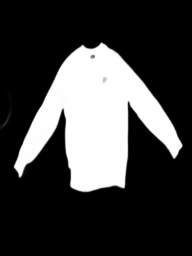

In [28]:

cloth_name = f'cloth_{int(time.time())}.png'
%cd ..
cloth_path = os.path.join('static/cloth', sorted(os.listdir('./static/cloth'))[0])

cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
%cd ACGPN
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Image.open(f'Data_preprocessing/test_edge/{cloth_name}')

### 모델 포즈, 세그멘테이션

In [31]:
%cd ..
sorted(os.listdir('static/img'))
%cd ACGPN

c:\Users\User\Desktop\coding\df
c:\Users\User\Desktop\coding\df\ACGPN


In [32]:
img_name = f'img_result.png'
%cd ..
img_path = os.path.join('static/img', sorted(os.listdir('static/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)
%cd ACGPN
img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)

!python Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --input-dir "Data_preprocessing/test_img" --output-dir "Data_preprocessing/test_label"

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
print(img_name)
print(pose_path)
generate_pose_keypoints(img_path, pose_path)

c:\Users\User\Desktop\coding\df
c:\Users\User\Desktop\coding\df\ACGPN



100%|██████████| 4/4 [00:02<00:00,  1.93it/s]


img_result.png
Data_preprocessing/test_pose\img_result_keypoints.json
File saved at Data_preprocessing/test_pose\img_result_keypoints.json


## 추론

In [33]:
file_path = 'Data_preprocessing\\test_pairs.txt'
os.remove("Data_preprocessing/test_pairs.txt") 
with open(file_path, 'w') as f:
    f.write(f'{img_name} {cloth_name}')

In [34]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

c:\Users\User\Desktop\coding\df\ACGPN\test.py:90: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data['label'].cpu().numpy() == 7).astype(np.float))
c:\Users\User\Desktop\coding\df\ACGPN\test.py:94: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-not

In [12]:
#import numpy
#print(numpy.__version__)

1.23.5


## 결과

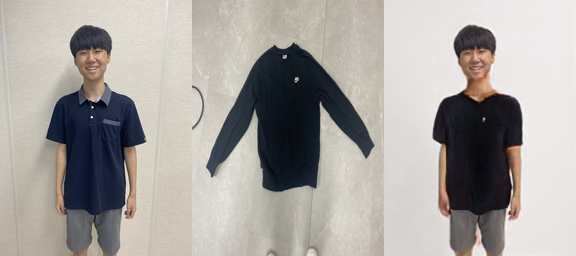

In [35]:
output_grid = np.concatenate([
    np.array(Image.open(f'Data_preprocessing/test_img/{img_name}')),
    np.array(Image.open(f'Data_preprocessing/test_color/{cloth_name}')),
    np.array(Image.open(f'results/test/try-on/test_label/{img_name}'))
], axis=1)

image_grid = Image.fromarray(output_grid)

image_grid